#**Lab 2**

Estimate the location from WIFI Signal Strength.
The dataset has 2,000 rows and 8 columns.
The data contains wifi signal strength observed from 7 wifi devices on a smartphone collected in an indoor space which could be used to estimate the location in one of the four rooms.
You can use ANN analysis for this exerise to improve the ANN performance.

In [140]:
# Mounting the Drive to Google Colab
from google.colab import drive

drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [141]:
# Importing required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [142]:
# Open data file
path = '/drive/MyDrive/Colab Notebooks/DL/Data/wifi.csv'
df = pd.read_csv(path)
df

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


In [143]:
# Loading data into pandas dataframe
df1 = pd.DataFrame(df, columns = df.columns)
df1.head()

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [144]:
df1.shape

(2000, 8)

In [145]:
df1.columns

Index(['Wifi 1', 'Wifi 2', 'Wifi 3', 'Wifi 4', 'Wifi 5', 'Wifi 6', 'Wifi 7',
       'Room'],
      dtype='object')

In [146]:
X = df1.drop('Room', axis = 1)

In [147]:
room_dummies = pd.get_dummies(df1['Room'])

dummy = pd.concat([df1['Room'], room_dummies], axis=1)
Y = dummy.drop('Room', axis = 1)

In [148]:
Y.value_counts()

1  2  3  4
0  0  0  1    500
      1  0    500
   1  0  0    500
1  0  0  0    500
dtype: int64

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('Y_train shape', Y_train.shape)
print('Y_test shape', Y_test.shape)

X_train shape (1600, 7)
X_test shape (400, 7)
Y_train shape (1600, 4)
Y_test shape (400, 4)


In [150]:
# Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [151]:
# Dense means linear equation
from keras.models import Sequential
from keras.layers import Dense
from keras import initializers
from keras import regularizers
from keras.callbacks import EarlyStopping

In [152]:
# Buidling the sequential model with 2 hidden layers
h1 = 100
h2 = 100

# Without regularization
# Input variables is 7 without the target, "input_dim" only for first time
model = Sequential()
model.add(Dense(h1, input_dim = 7, activation = 'relu'))
model.add(Dense(h2, activation = 'relu'))

# Output layer, "1" because the target variable is either "Yes" or "No", "Softmax" not suitable because it is for multi-class (more than 2 categories)
model.add(Dense(4, activation = 'softmax'))

# With regularization
# Input variables is 7 without the target, "input_dim" only for first time
model2 = Sequential()
model2.add(Dense(h1, input_dim = 7, activation = 'relu', 
                 kernel_initializer = 'he_normal', 
                 kernel_regularizer = regularizers.l2(0.01)))
model2.add(Dense(h2, activation = 'relu'))

# Output layer, "1" because the target variable is either "Yes" or "No", "Softmax" not suitable because it is for multi-class (more than 2 categories)
model2.add(Dense(4, activation = 'softmax'))

In [153]:
# Compiling the sequential model, "categorical_crossentropy" more suitable for multi-class. "SGD", "RMSprop", "Adam" are more commonly used in optimization the weight value.
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
model2.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [154]:
# Training the model for 10 epochs
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 100, validation_data = (X_test, Y_test))
history2 = model2.fit(X_train, Y_train, epochs = 10, batch_size = 100, validation_data = (X_test, Y_test))

Epoch 1/10
16/16 [==============================] - 1s 23ms/step - loss: 0.9841 - accuracy: 0.6956 - val_loss: 0.6861 - val_accuracy: 0.8050
Epoch 2/10
16/16 [==============================] - 0s 8ms/step - loss: 0.5254 - accuracy: 0.8575 - val_loss: 0.4025 - val_accuracy: 0.8825
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 0.3113 - accuracy: 0.9237 - val_loss: 0.2677 - val_accuracy: 0.9300
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: 0.2036 - accuracy: 0.9506 - val_loss: 0.1916 - val_accuracy: 0.9575
Epoch 5/10
16/16 [==============================] - 0s 5ms/step - loss: 0.1469 - accuracy: 0.9600 - val_loss: 0.1510 - val_accuracy: 0.9675
Epoch 6/10
16/16 [==============================] - 0s 6ms/step - loss: 0.1169 - accuracy: 0.9669 - val_loss: 0.1292 - val_accuracy: 0.9650
Epoch 7/10
16/16 [==============================] - 0s 6ms/step - loss: 0.1002 - accuracy: 0.9700 - val_loss: 0.1143 - val_accuracy: 0.9650
Epoch 8/10
16/16 [=

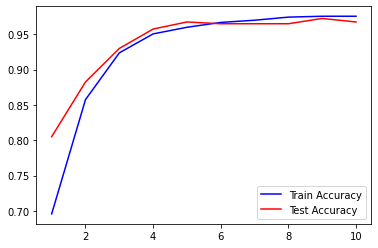

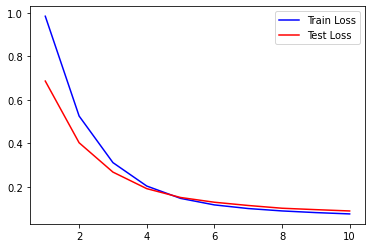

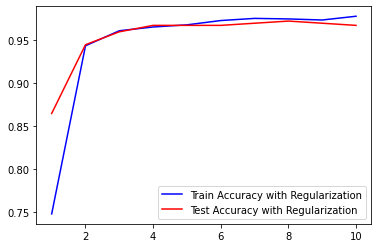

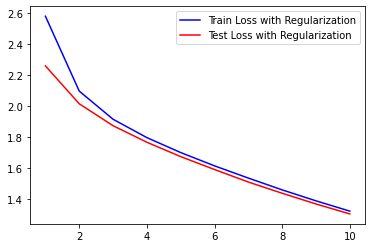

In [155]:
import matplotlib.pyplot as plt

# Without Regularization
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc2) + 1)

plt.plot(epochs, acc2, 'b', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.show()

# With Regularization
acc2 = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc2) + 1)

plt.plot(epochs, acc2, 'b', label = 'Train Accuracy with Regularization')
plt.plot(epochs, val_acc, 'r', label = 'Test Accuracy with Regularization')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss with Regularization')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss with Regularization')
plt.legend()
plt.show()